In [1]:
# I load the needed libraries
library(dplyr)
library(scales)
library(GoFKernel)

library(mvtnorm)
library(gplots)

options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




# Preparation of the simulation

I load the functions from the class file:


In [2]:
source("../MCMC.R")

I define then the function that I want to use as output of the MCMCs:

In [3]:
# Function to sampled from: n-dim gaussian with chosen sigmas and centers
cauchy2_gauss1 = function (theta) {

    sigmas = 2.5
    centers = 0.4

    product = exp(-(theta[1] - centers)**2/sigmas**2)

    product = product * (dcauchy(theta[2], -5, 2) + 4*dcauchy(theta[2], 8, 3))

    product = product * (dcauchy(theta[3], -10, 2) + 4*dcauchy(theta[3], 10, 4))

    return (product)

} 

chosen_function = cauchy2_gauss1

Then I only have to determine the parameters for the initialization = the "hyperparameters" of the simulations

In [4]:
# The initial parameters are:
init = c(4, 4, 4)
std = diag(1, 3)

N = as.integer(1e5)
burn_in = as.integer(1e4)

print_step = as.integer(1e2)
# print_init = as.integer(1e3)

N_tot = N + burn_in

# For Haario:
epsilon = 0.001


# Simulations

Acceptance rate =  77.36273 %


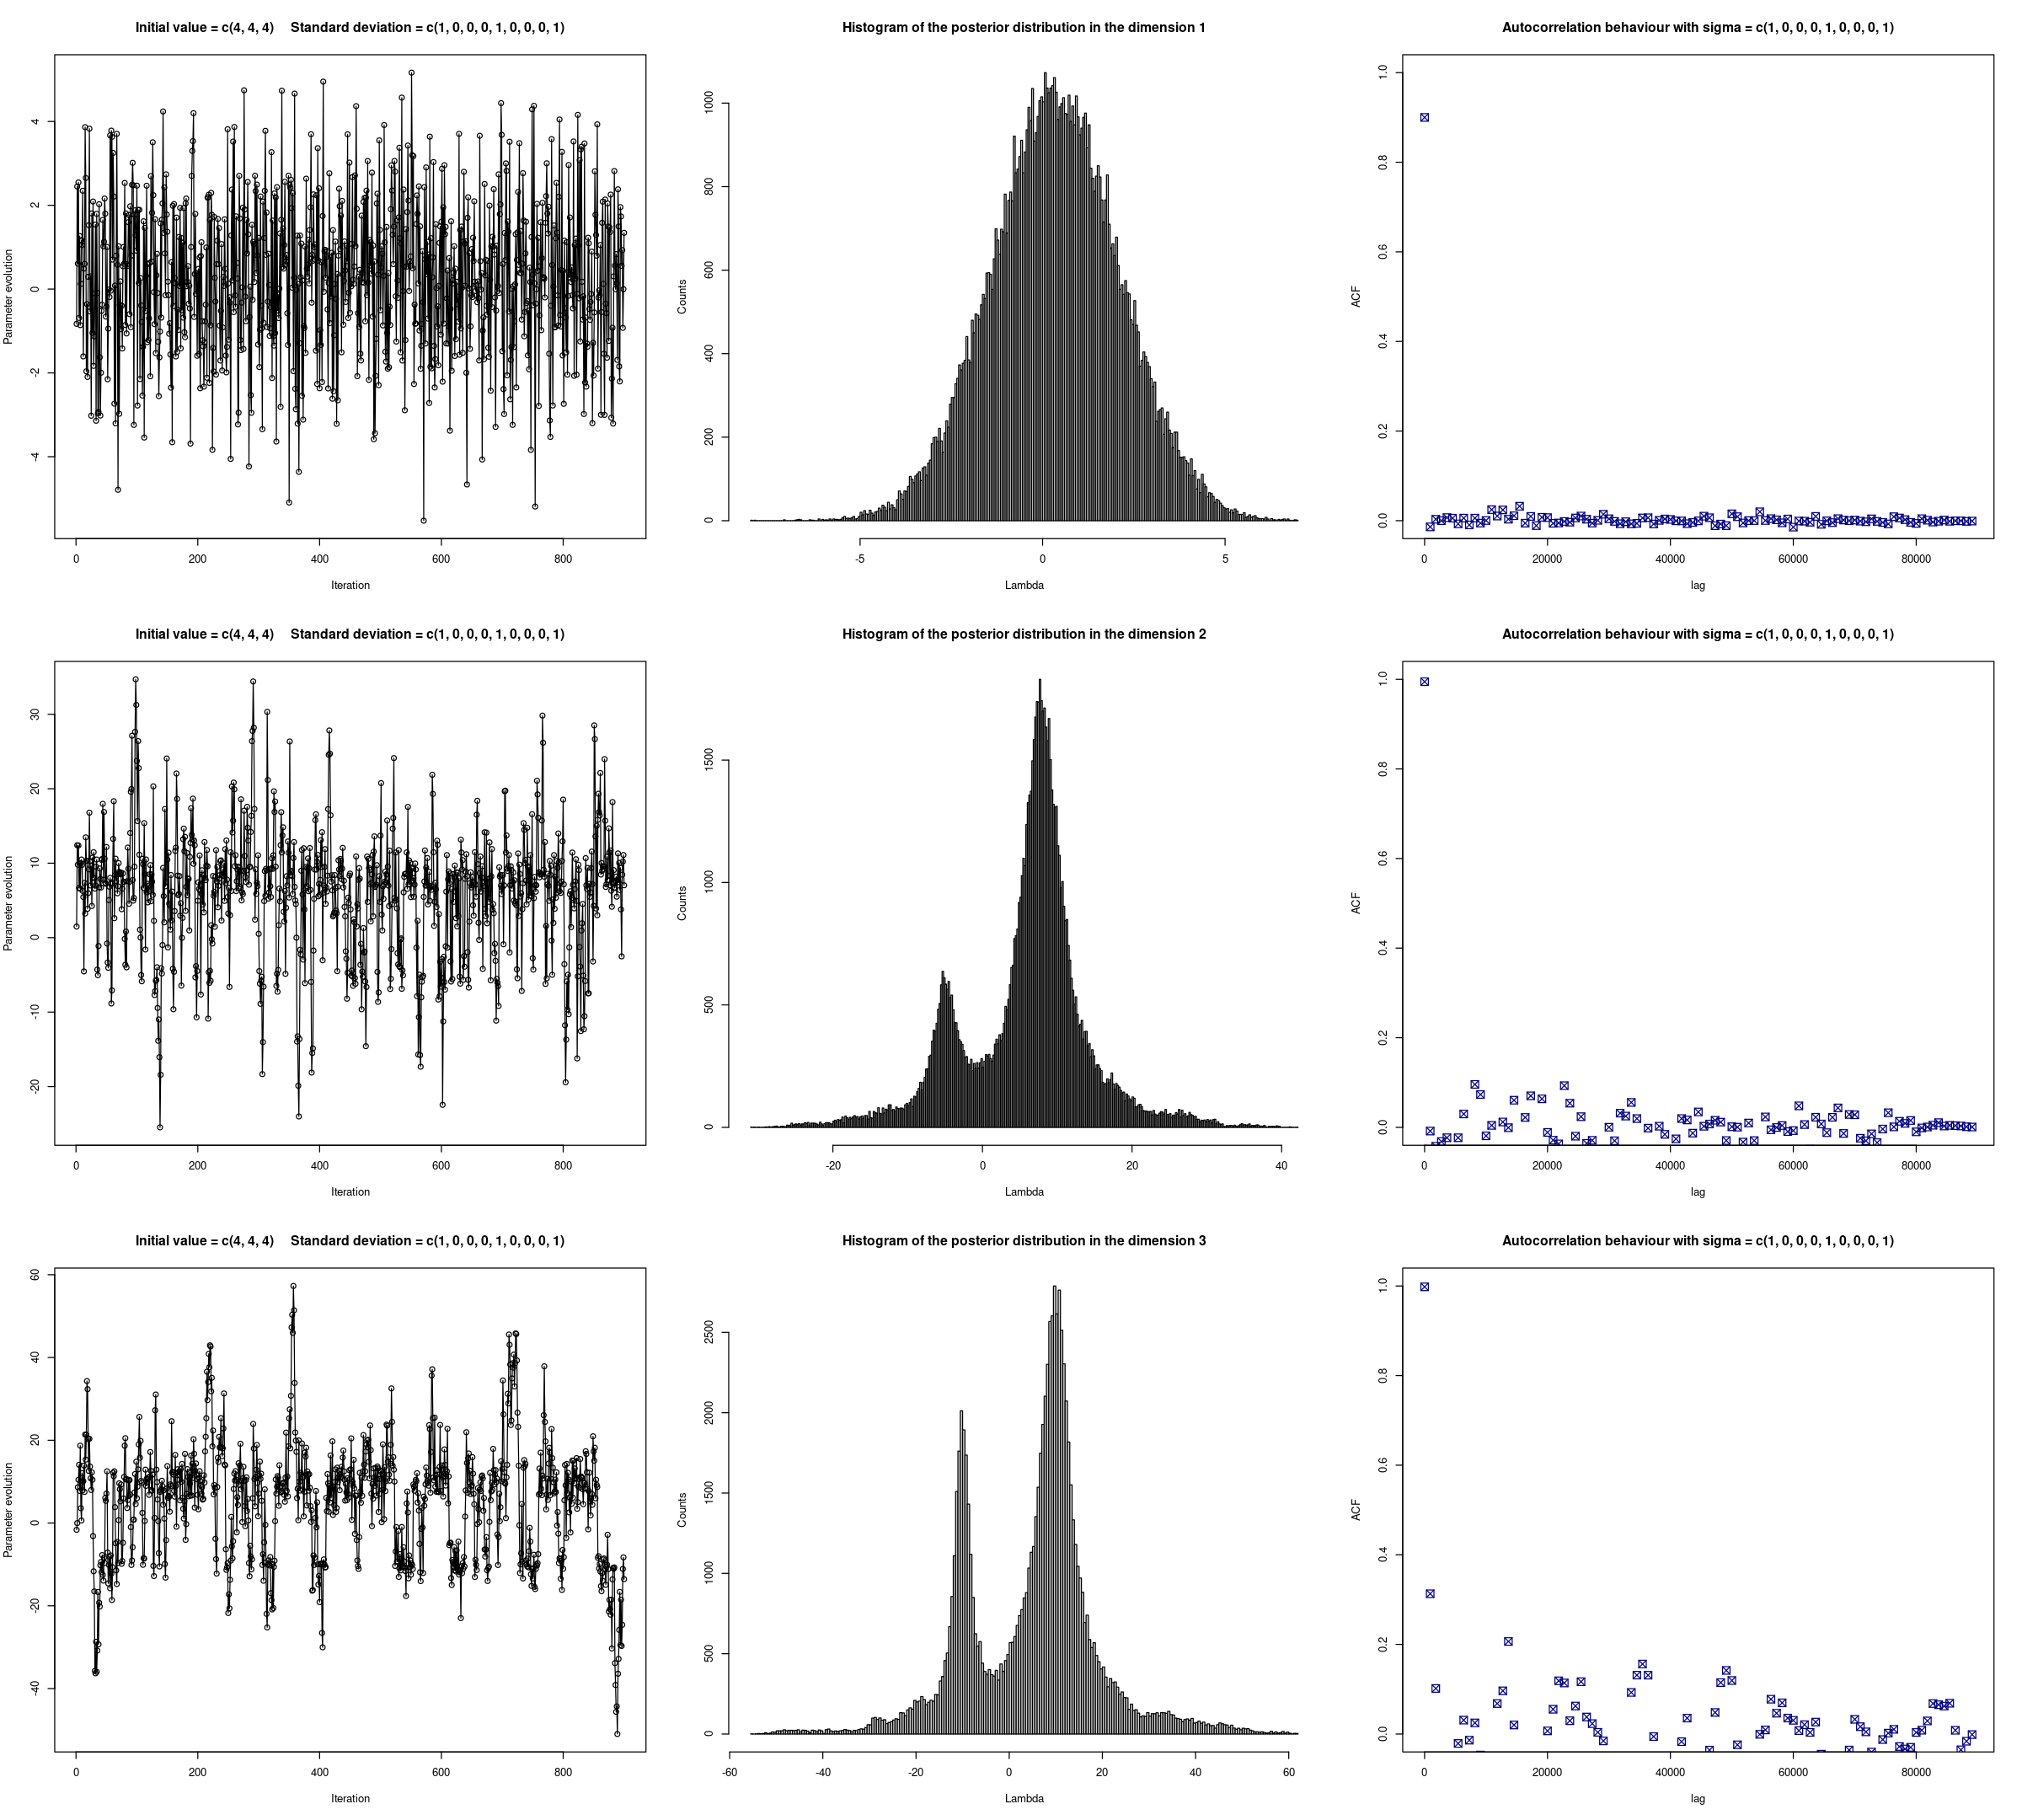

In [5]:
# MVTNORM 

# Evaluate then the MCMC
mcmc_g = random_steps_mvtnorm (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

# Selecting the sequence after the burn-in
mcmc_g = mcmc_g[burn_in:N, ]

# Plotting the results
show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  84.61455 %


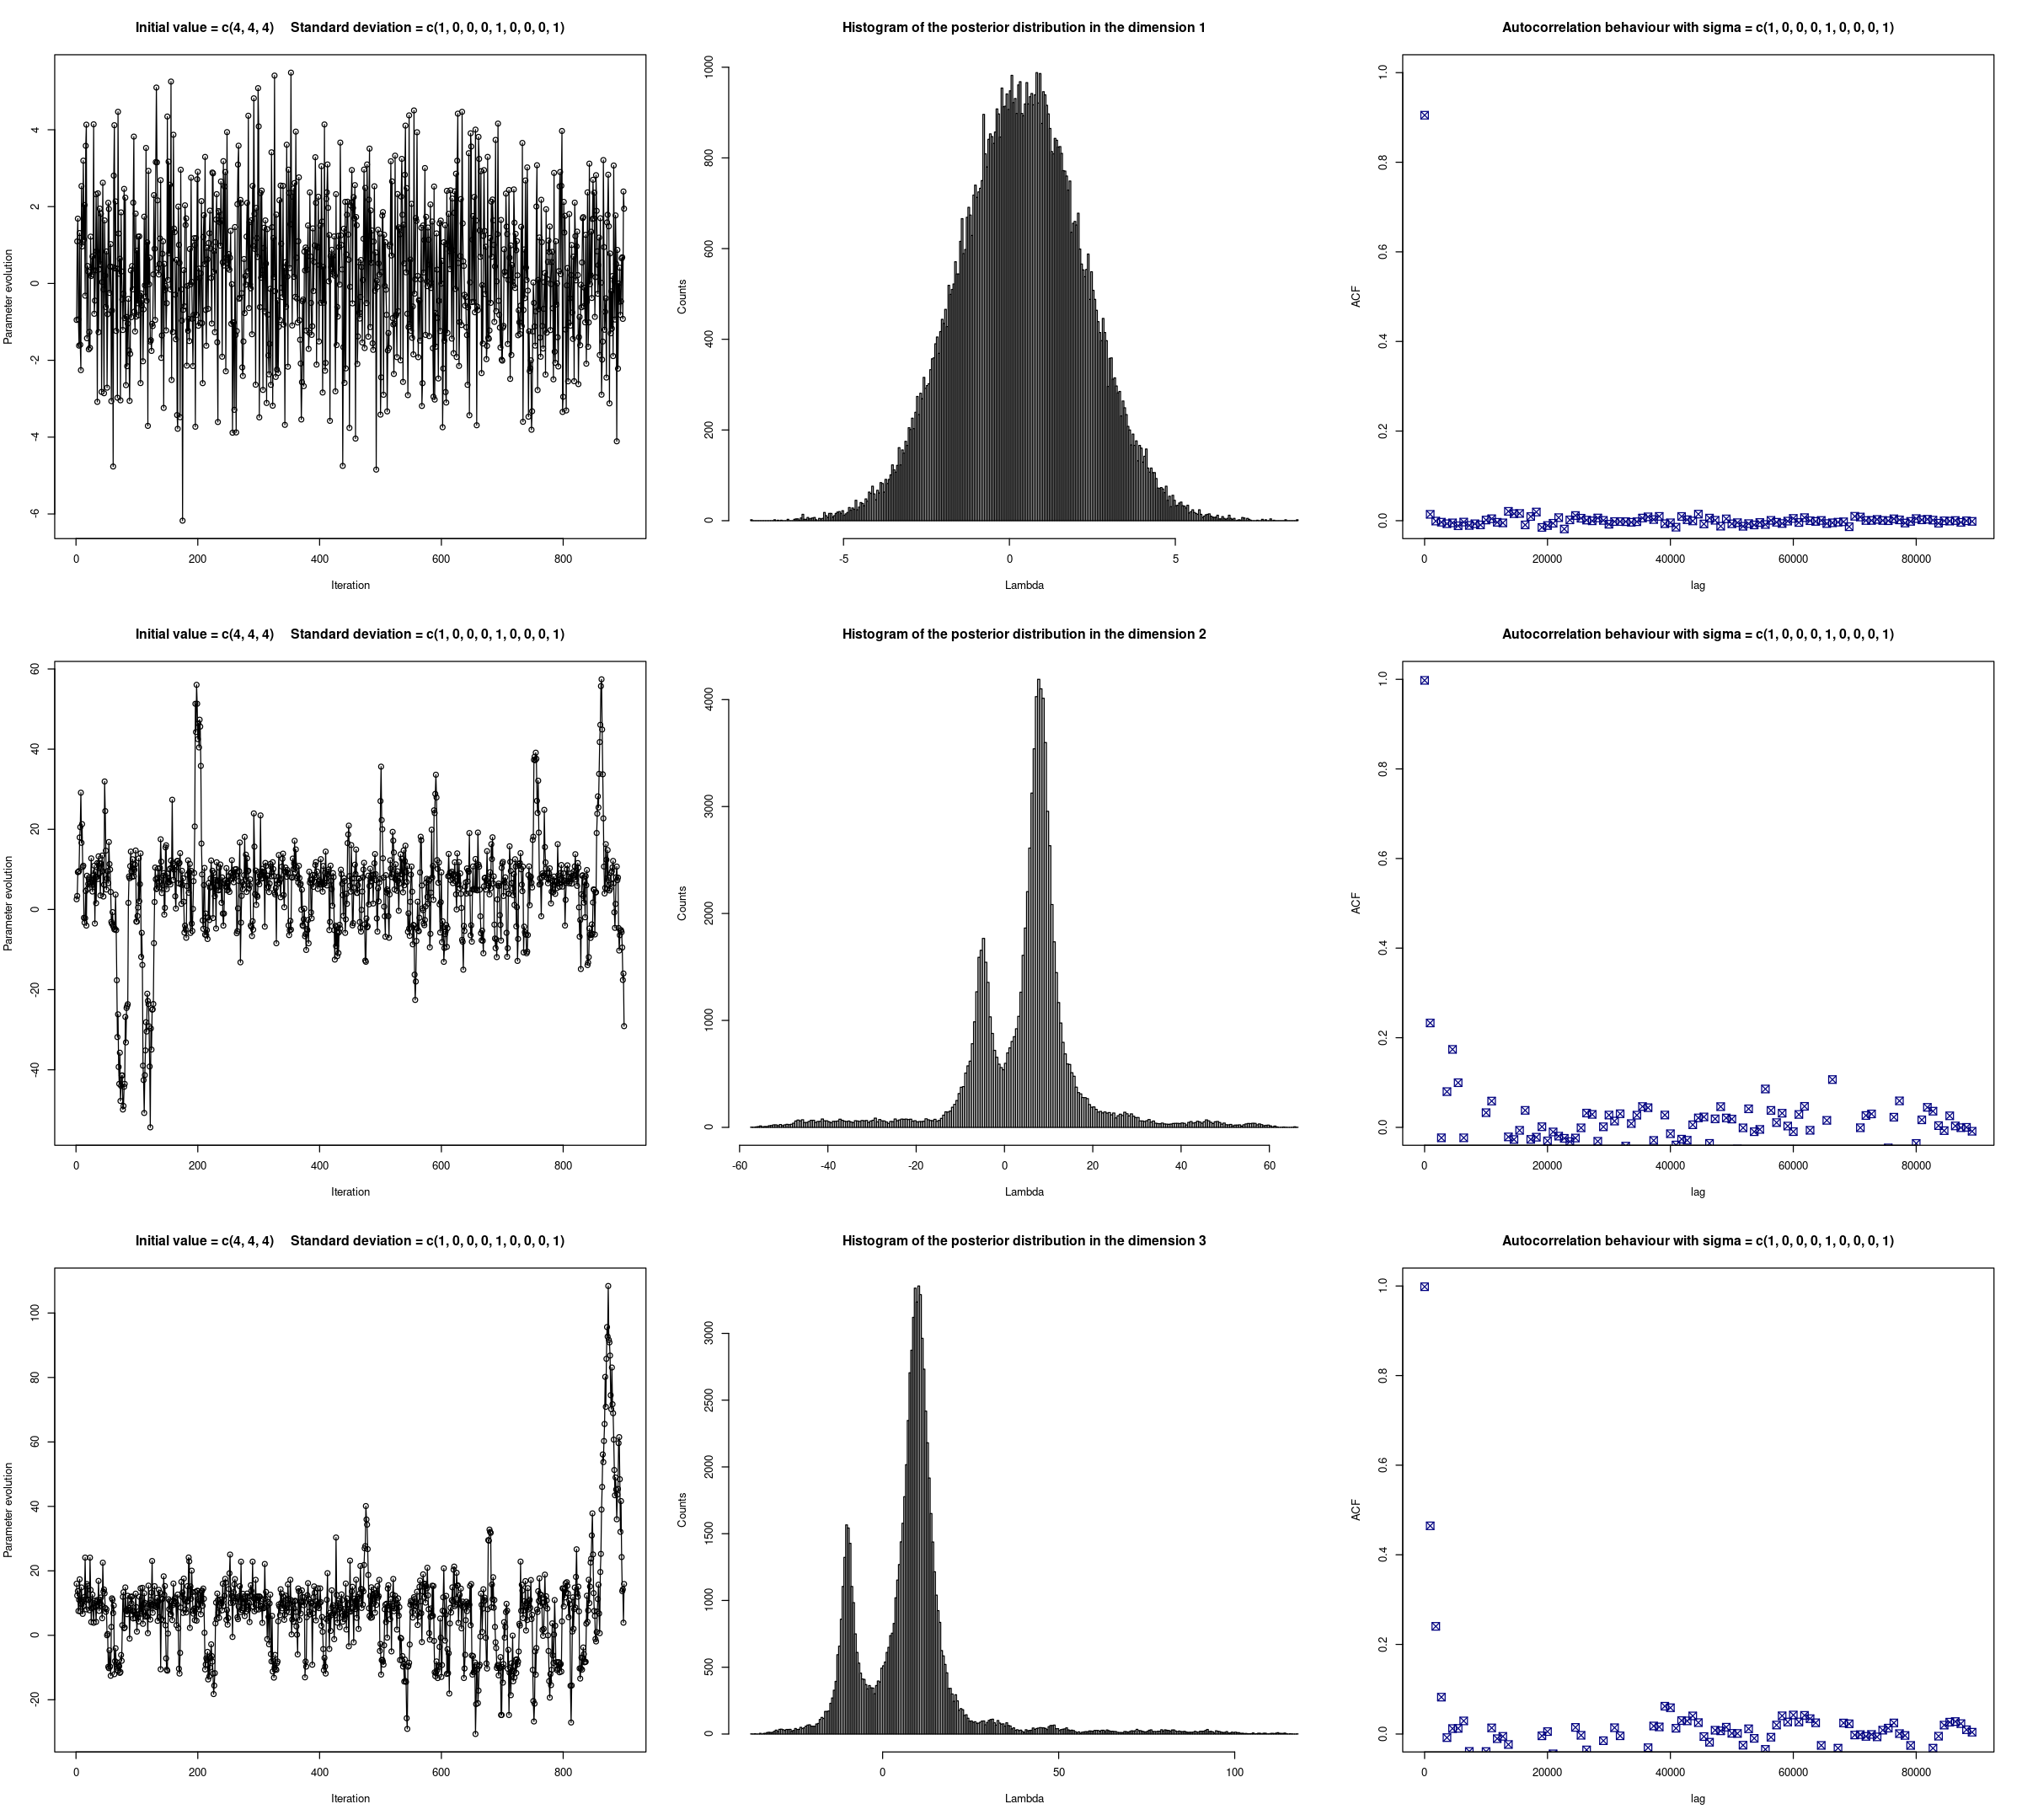

In [6]:
# MVTNORM GIBBS

mcmc_g = random_steps_mvtnorm_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [7]:
# # SIMPLE ADAPTIVE

# mcmc_g = random_steps_simple (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [8]:
# # SIMPLE ADAPTIVE GIBBS

# mcmc_g = random_steps_simple_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  19.72727 %
Final mean =  0.3886917 5.202215 8.777738 
Final covariance matrix = 
          [,1]        [,2]       [,3]
[1,]  6.411703    7.575089   12.95673
[2,]  7.575089 1183.099842  187.14947
[3,] 12.956735  187.149465 4393.31285


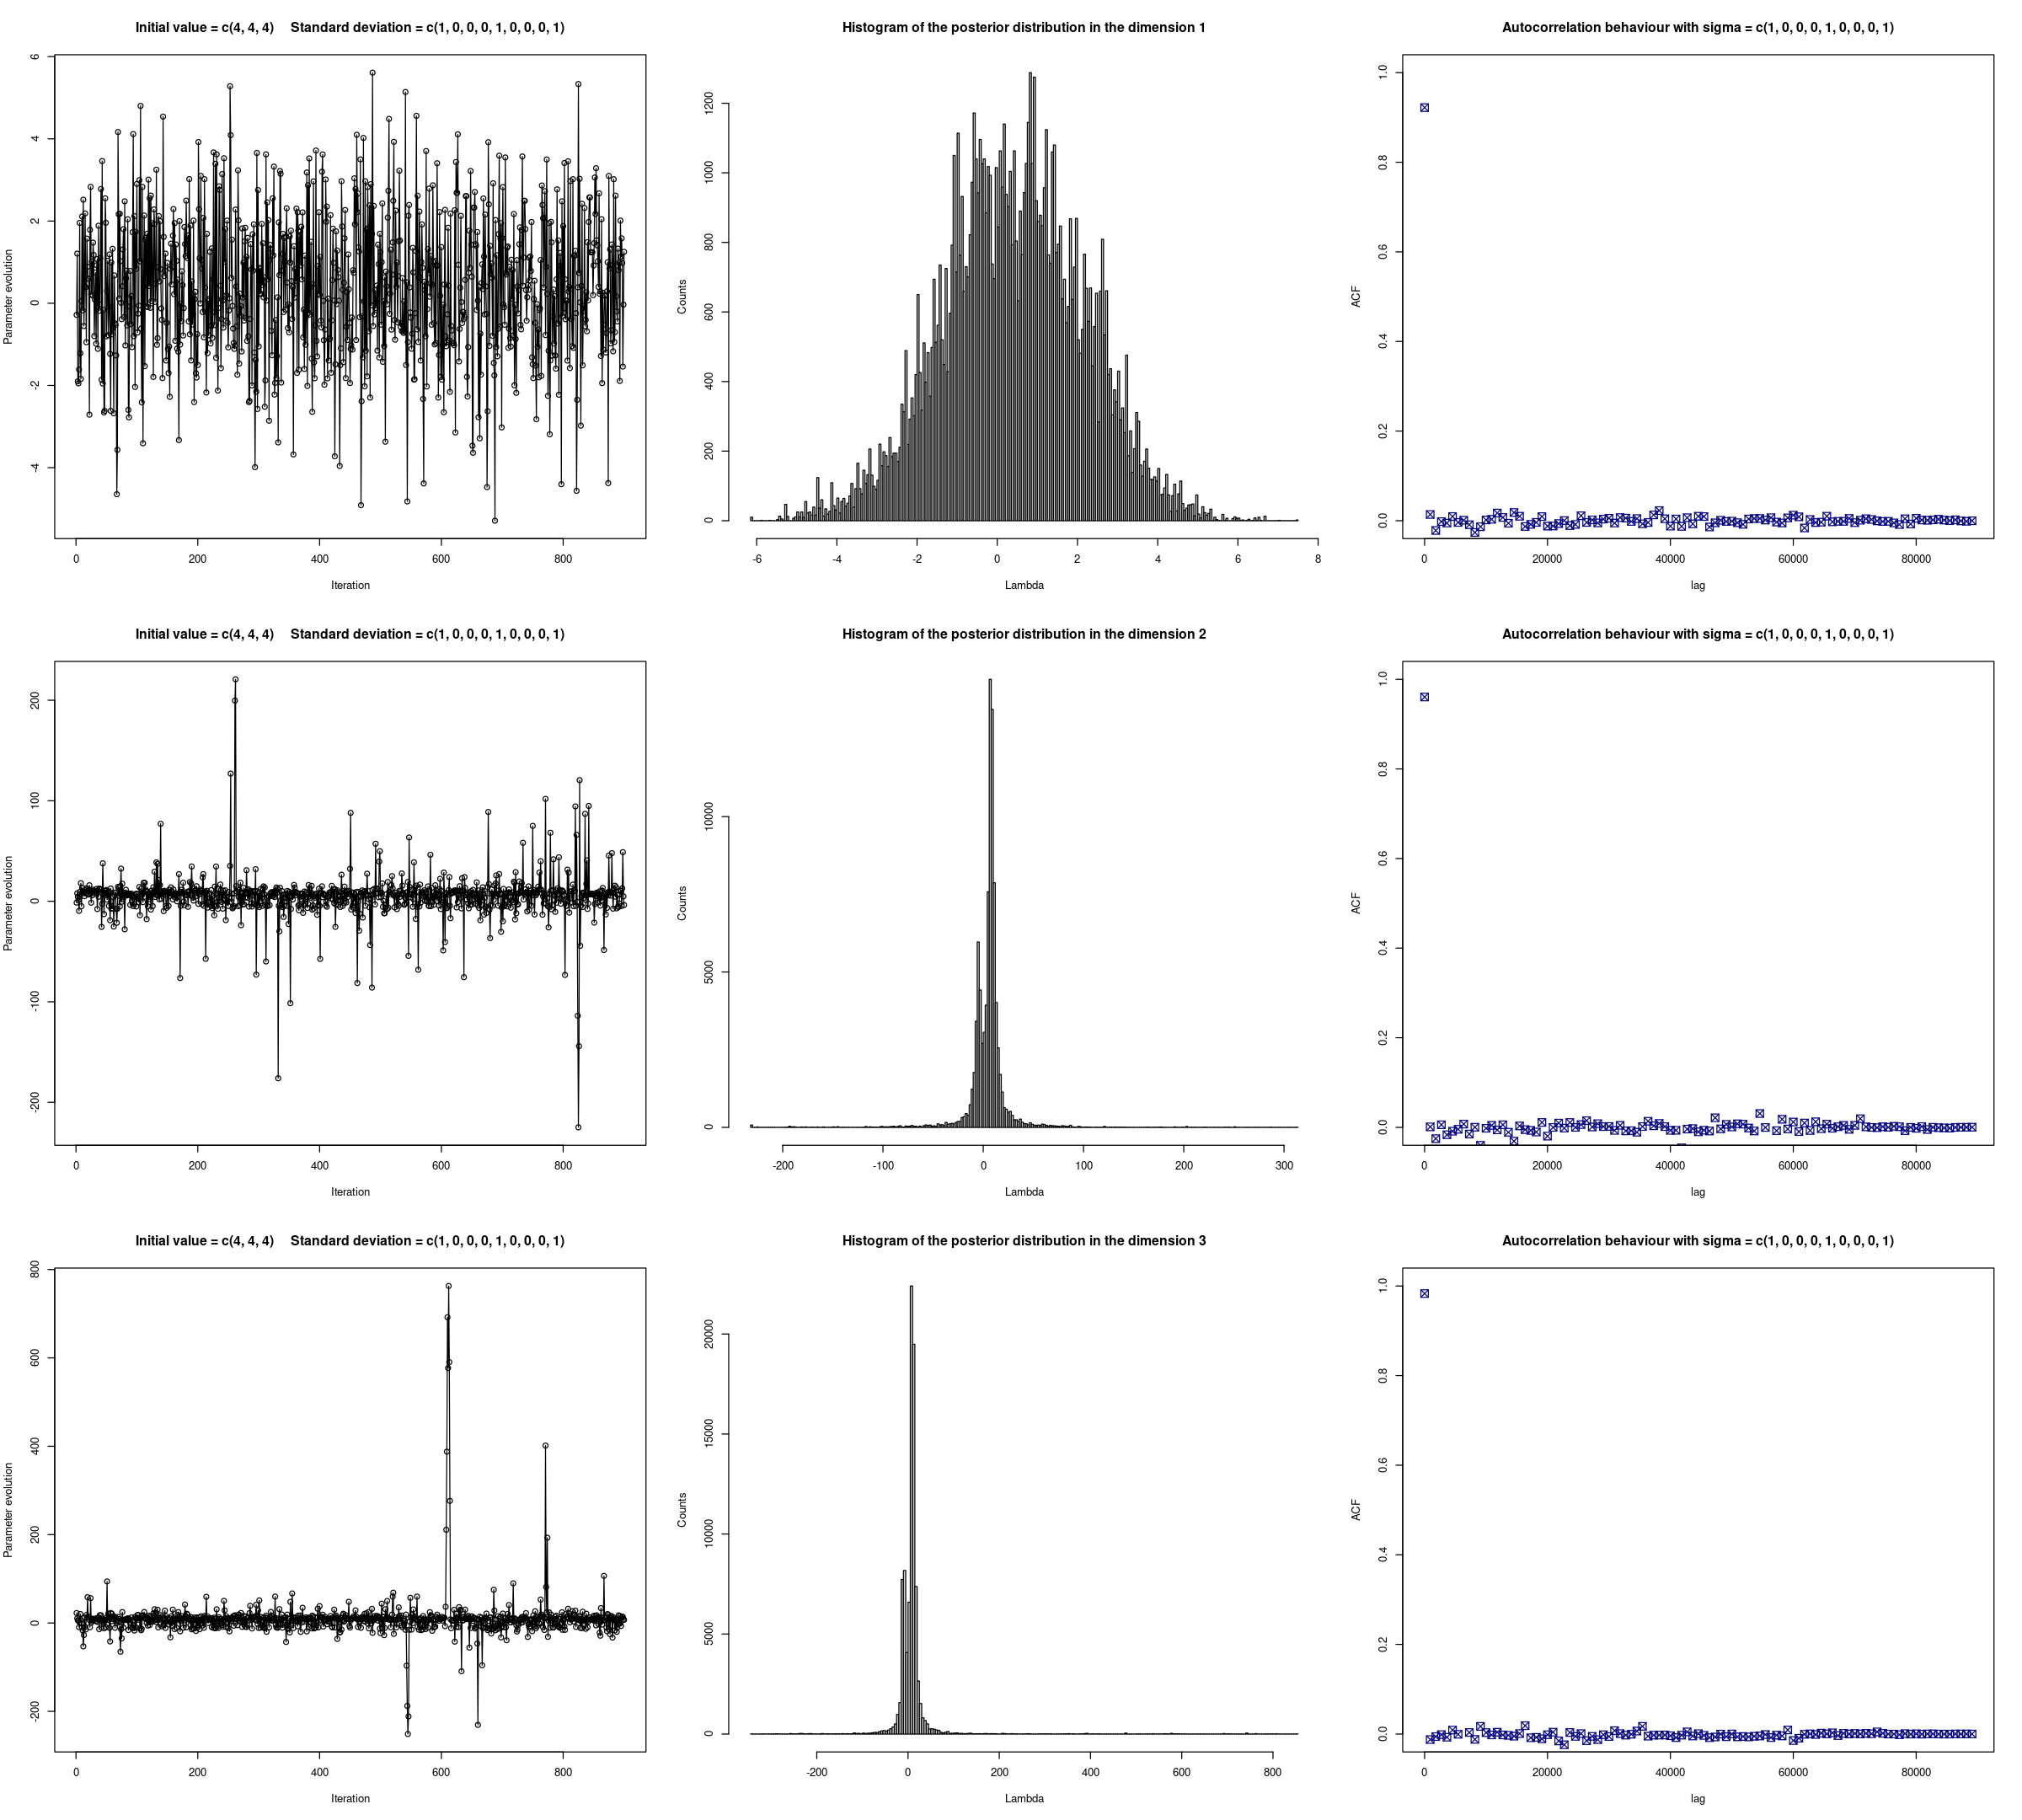

In [9]:
# HAARIO

mcmc_g = random_steps_haario (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  40.93545 %
Final mean =  0.3981803 7.350992 6.647155 
Final covariance matrix = 
          [,1]        [,2]      [,3]
[1,]  7.067644    6.059742  10.35834
[2,]  6.059742 2305.434246 121.08344
[3,] 10.358338  121.083436 688.73703


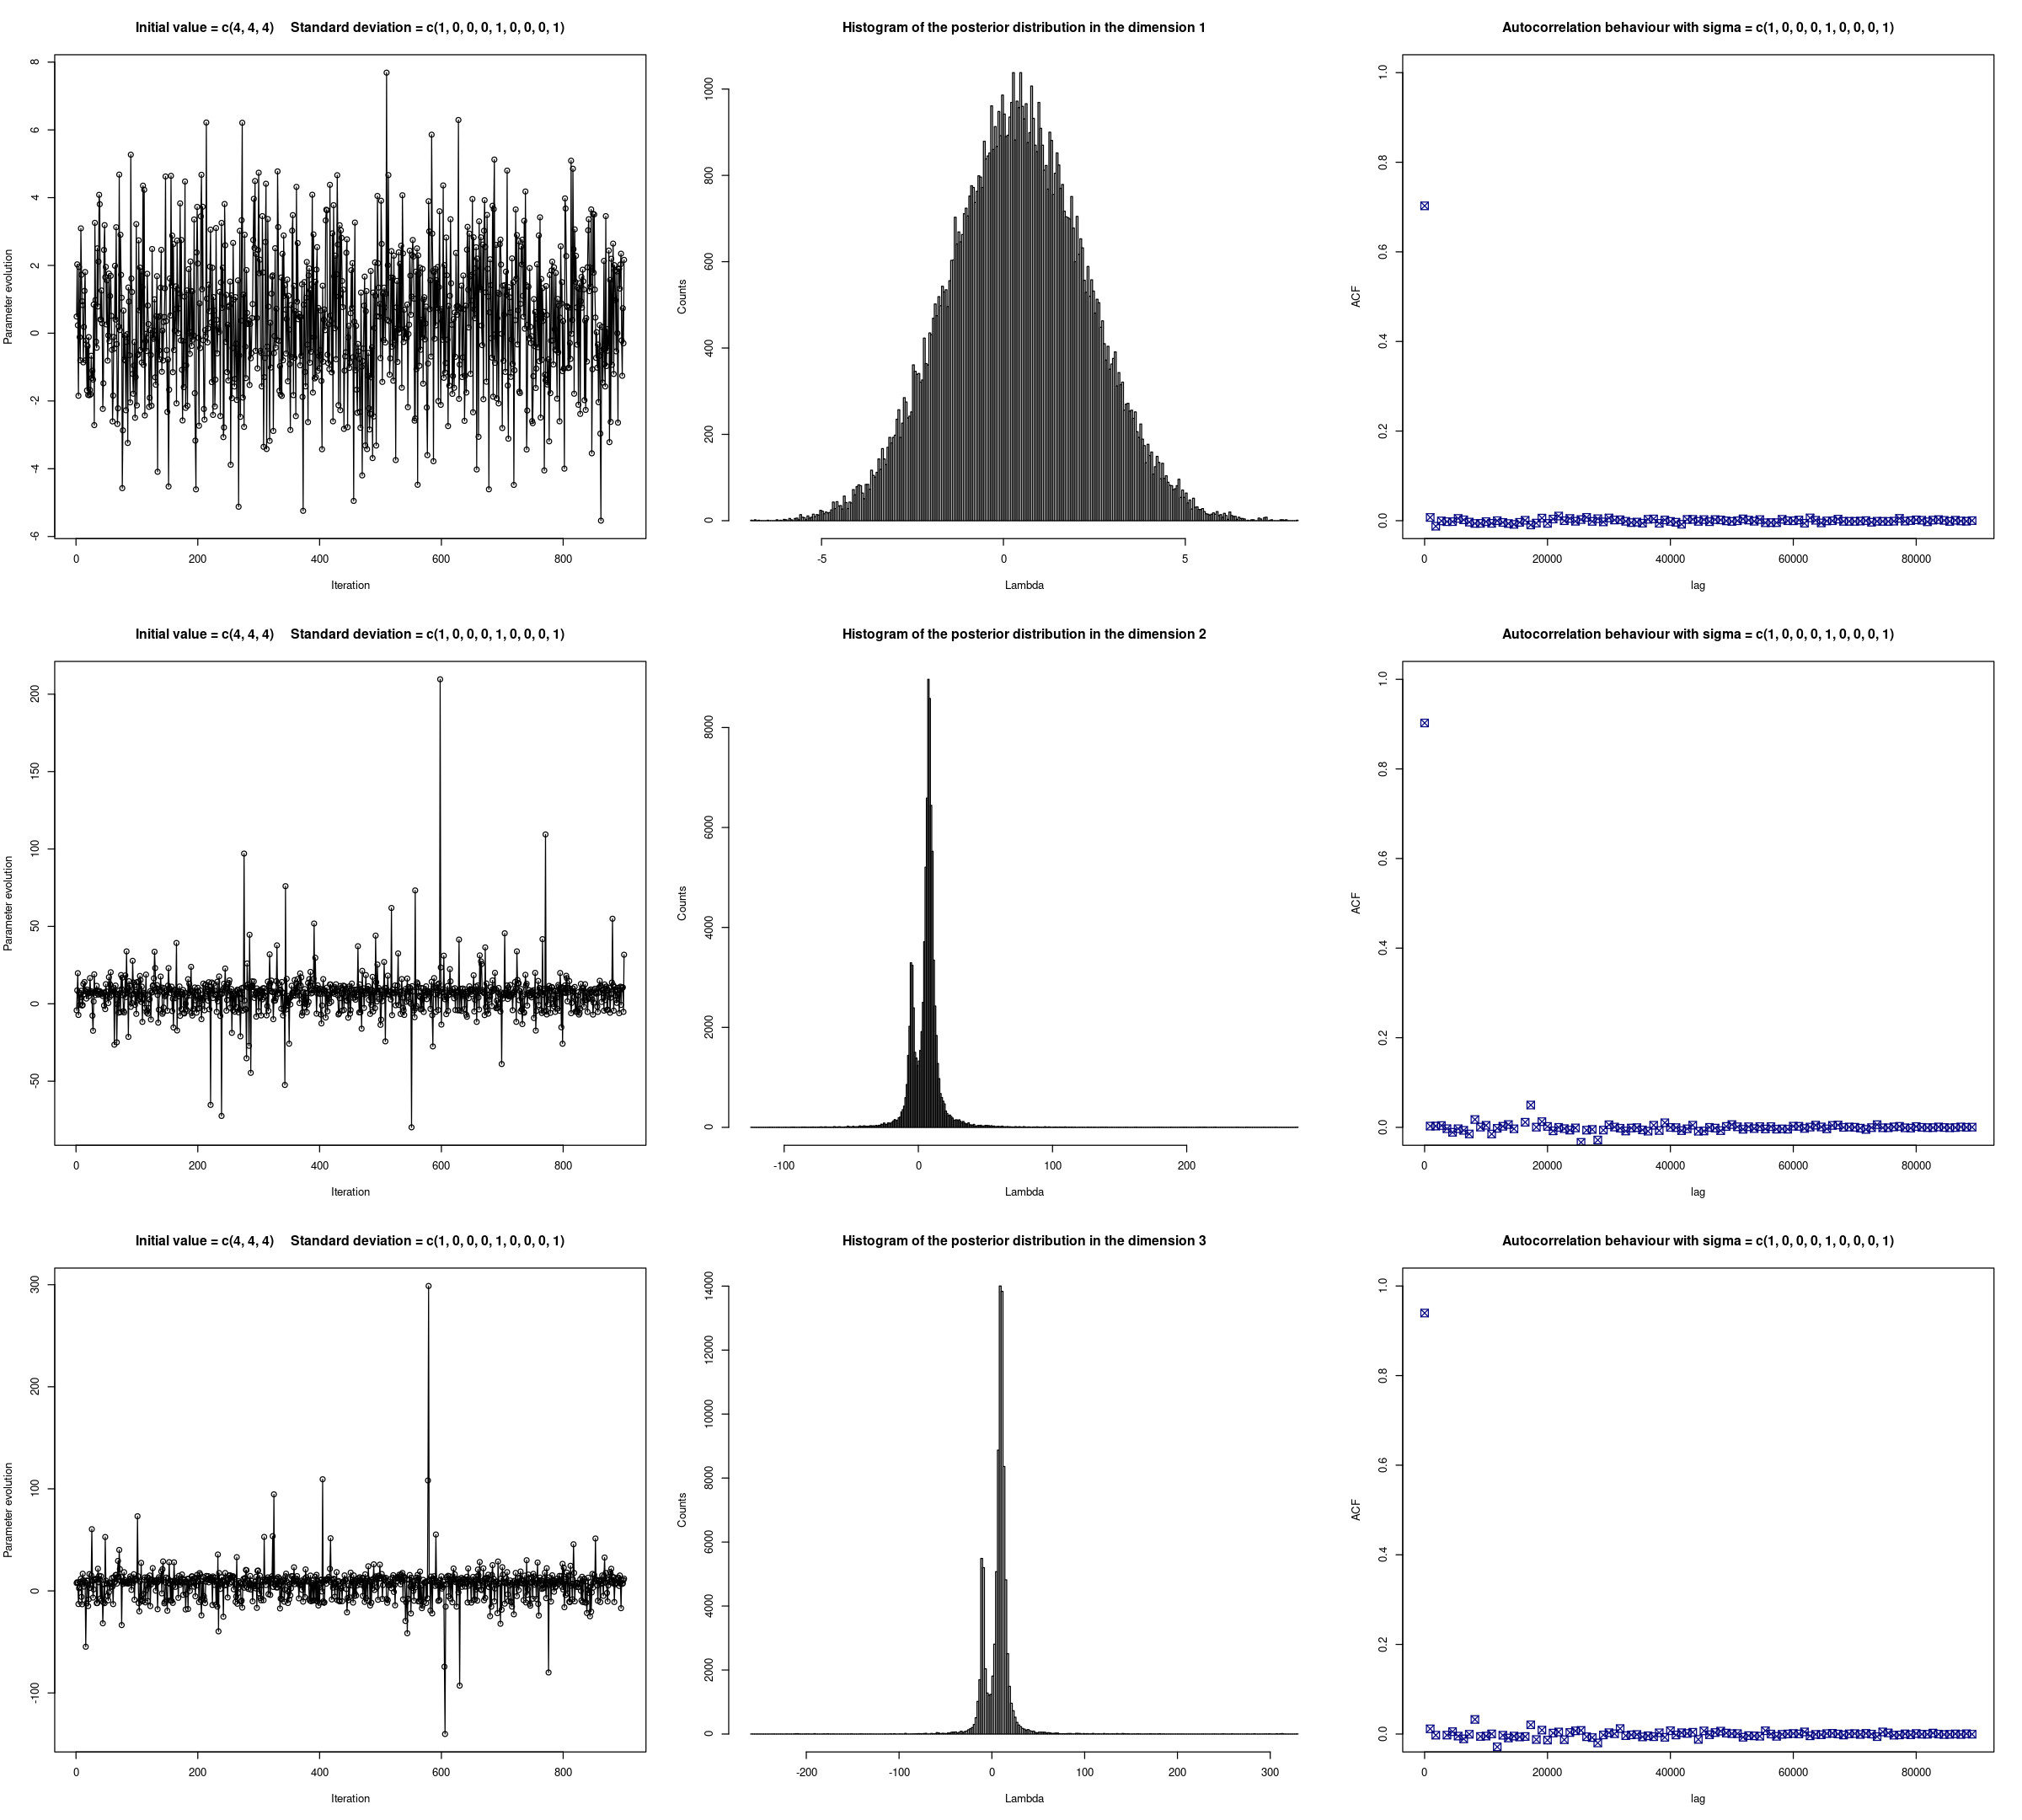

In [10]:
# HAARIO GIBBS

mcmc_g = random_steps_haario_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                    sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  34.51818 %
Final mean =  0.4773515 6.319346 5.961014 
Final covariance matrix = 
          [,1]        [,2]        [,3]
[1,] 3.1543964   0.3091293   0.8761946
[2,] 0.3091293 733.3900497  -2.1639907
[3,] 0.8761946  -2.1639907 653.5809540


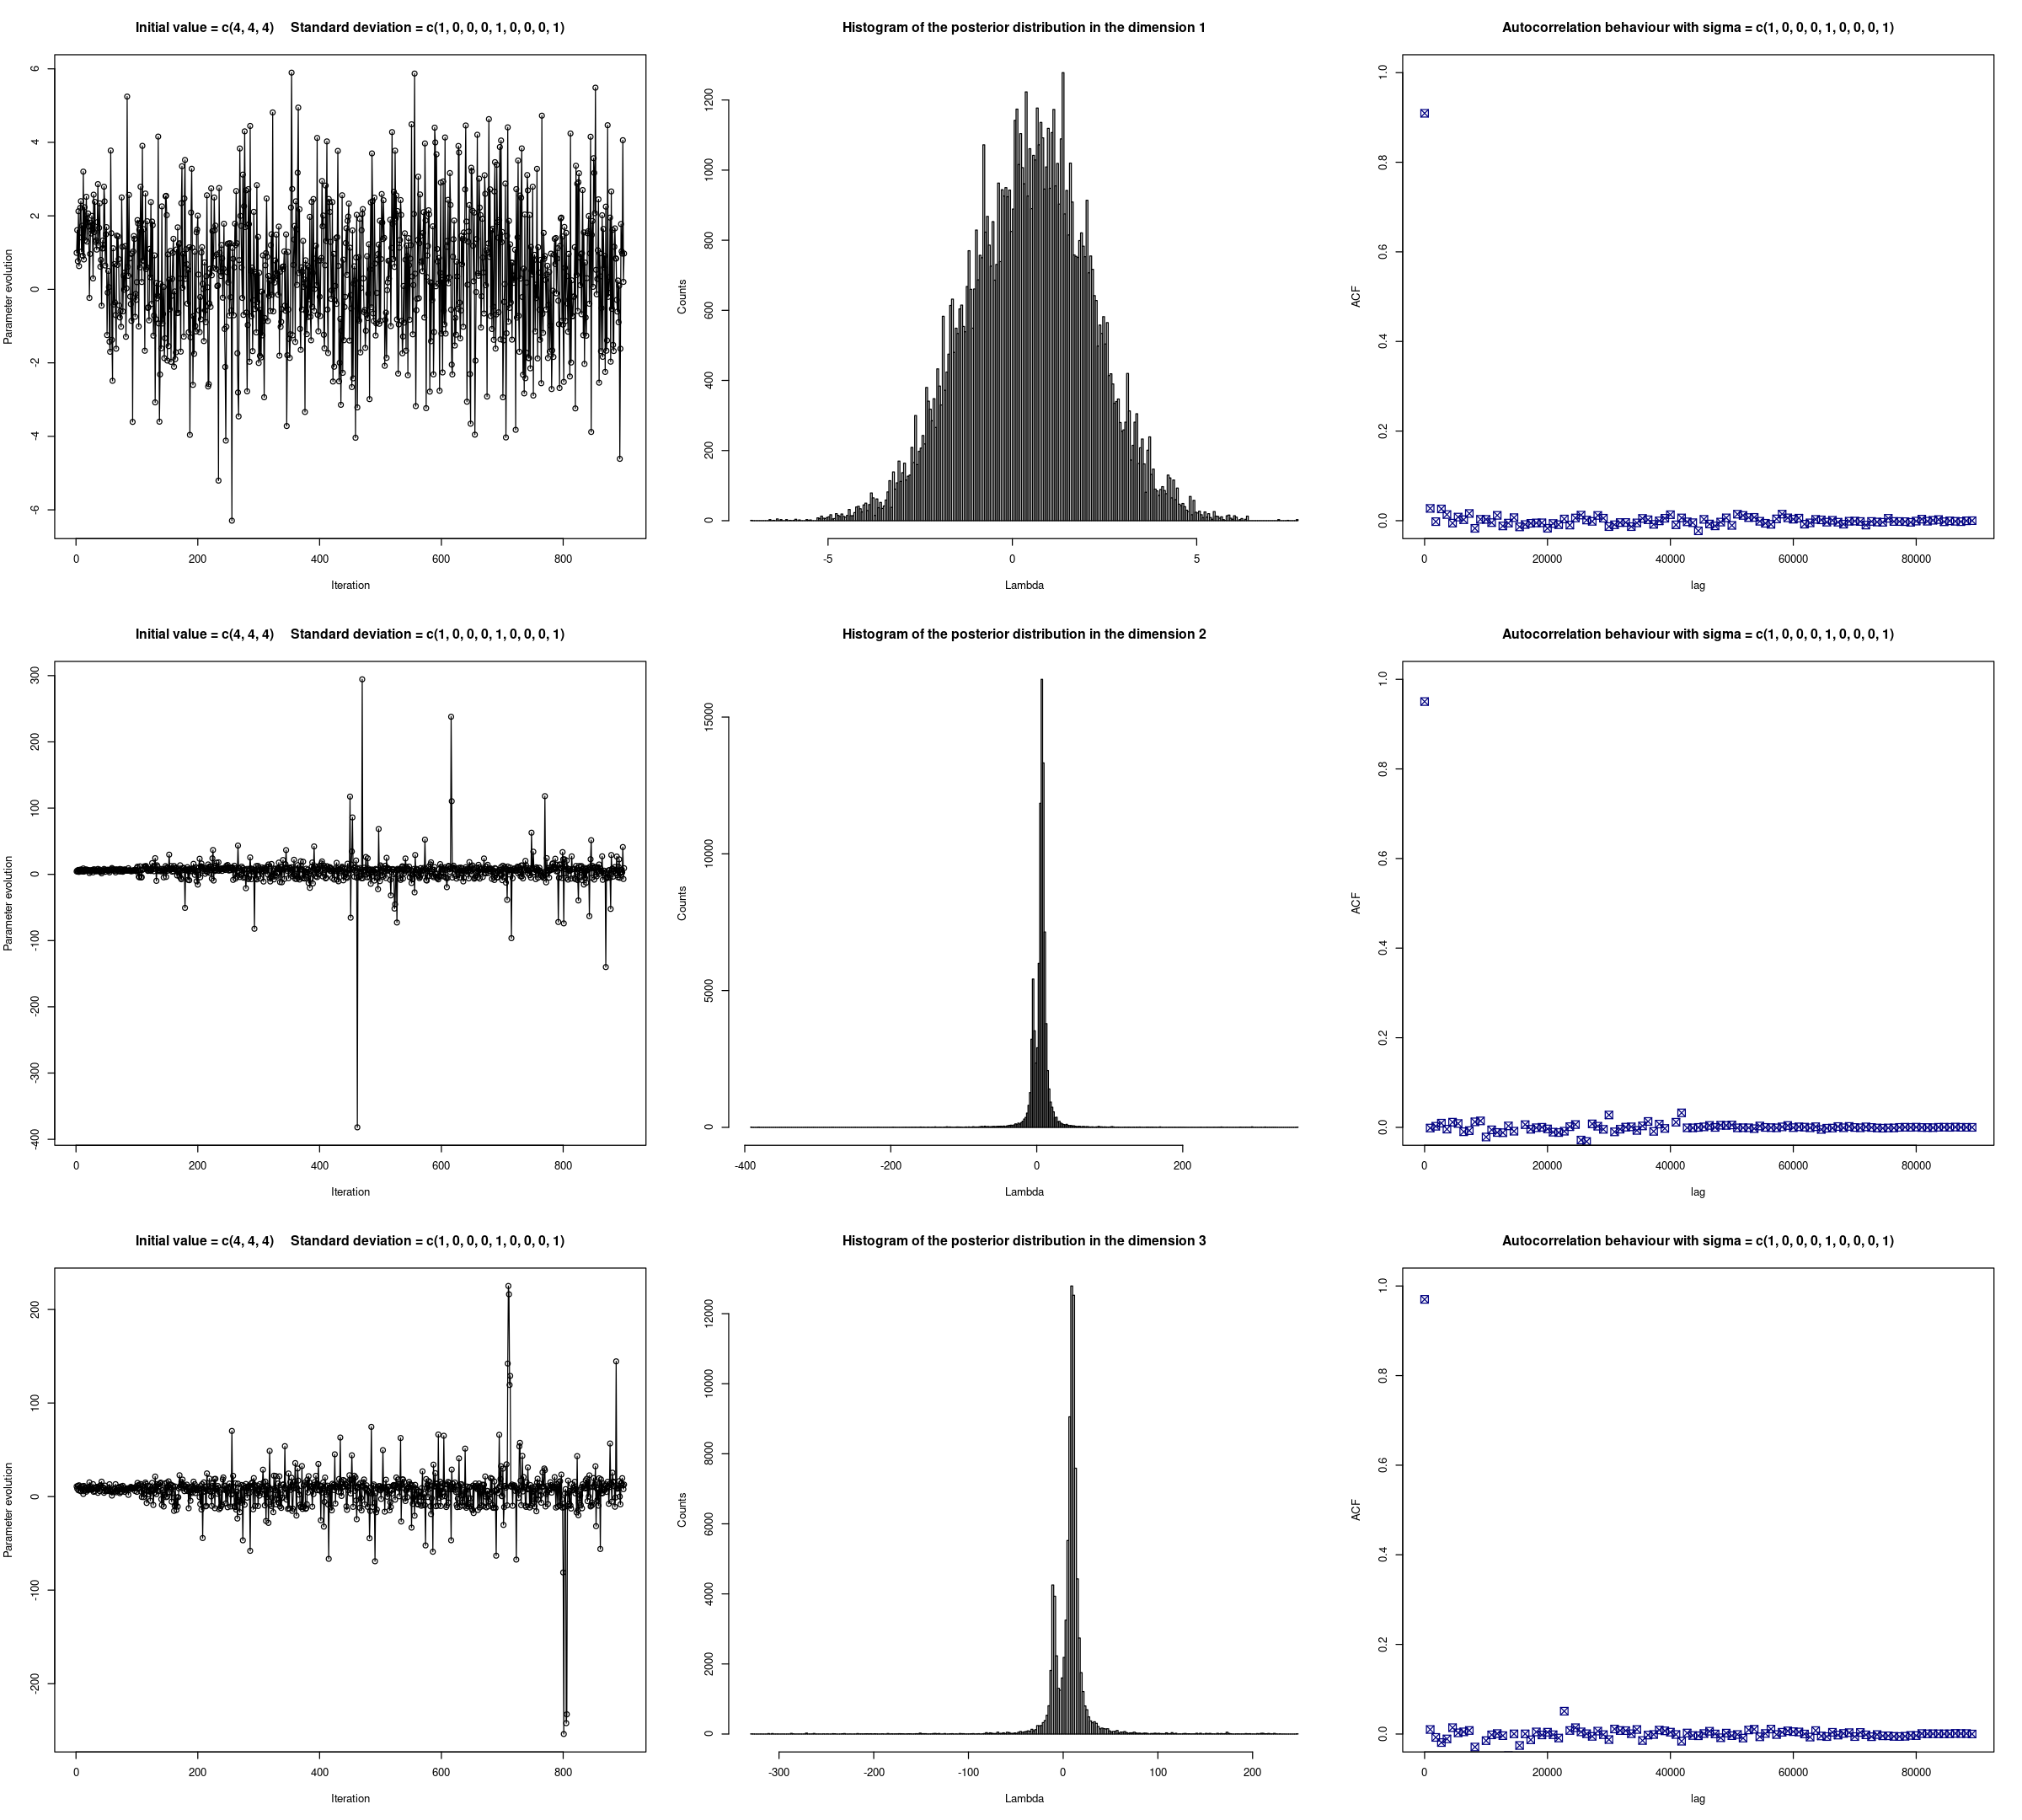

In [11]:
# RAO

mcmc_g = random_steps_AM_rao (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  53.46152 %
Final mean =  0.3990393 4.720064 5.799235 
Final covariance matrix = 
           [,1]        [,2]        [,3]
[1,]  3.5463655  -0.2624743   0.1794808
[2,] -0.2624743 209.5879612   7.2734578
[3,]  0.1794808   7.2734578 124.0628491


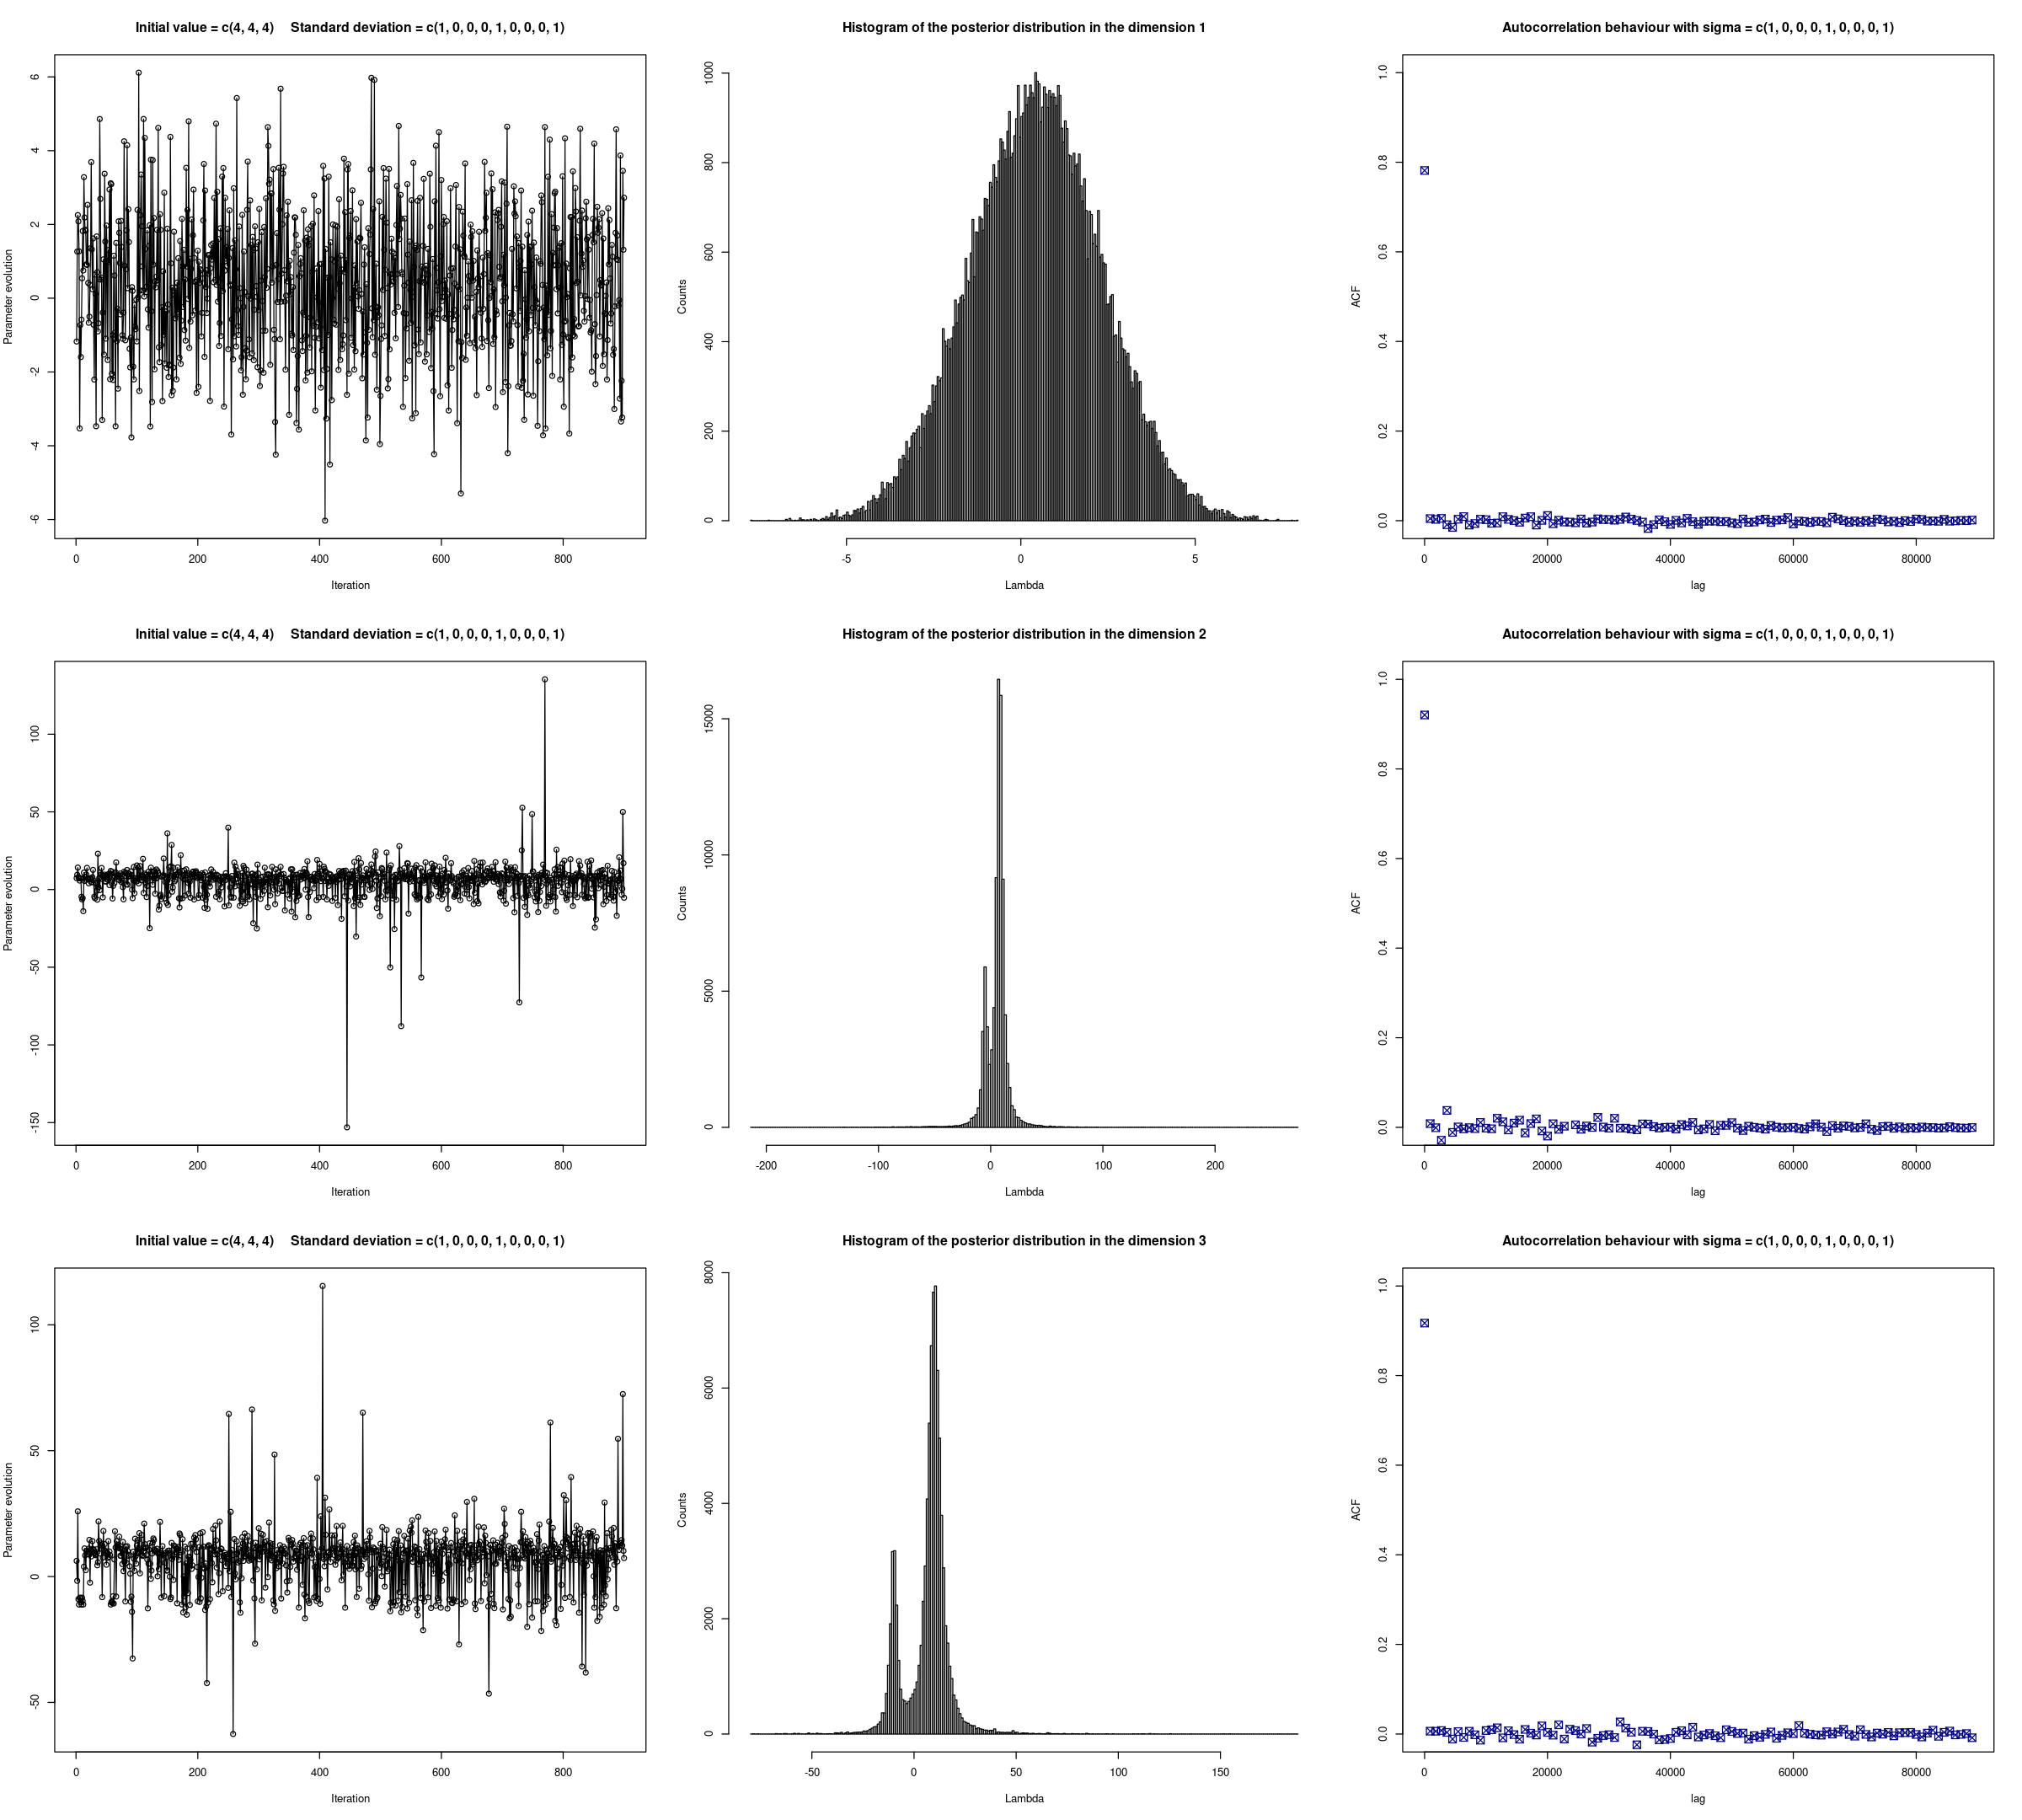

In [12]:
# RAO GIBBS

mcmc_g = random_steps_AM_rao_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  48.53091 %
Final mean =  0.1770353 5.355388 6.990262 
Final lambda =  0.2779924 
Final covariance matrix = 
          [,1]       [,2]       [,3]
[1,]  3.689259  -2.004417  -1.158432
[2,] -2.004417 296.342899   9.454942
[3,] -1.158432   9.454942 450.370340


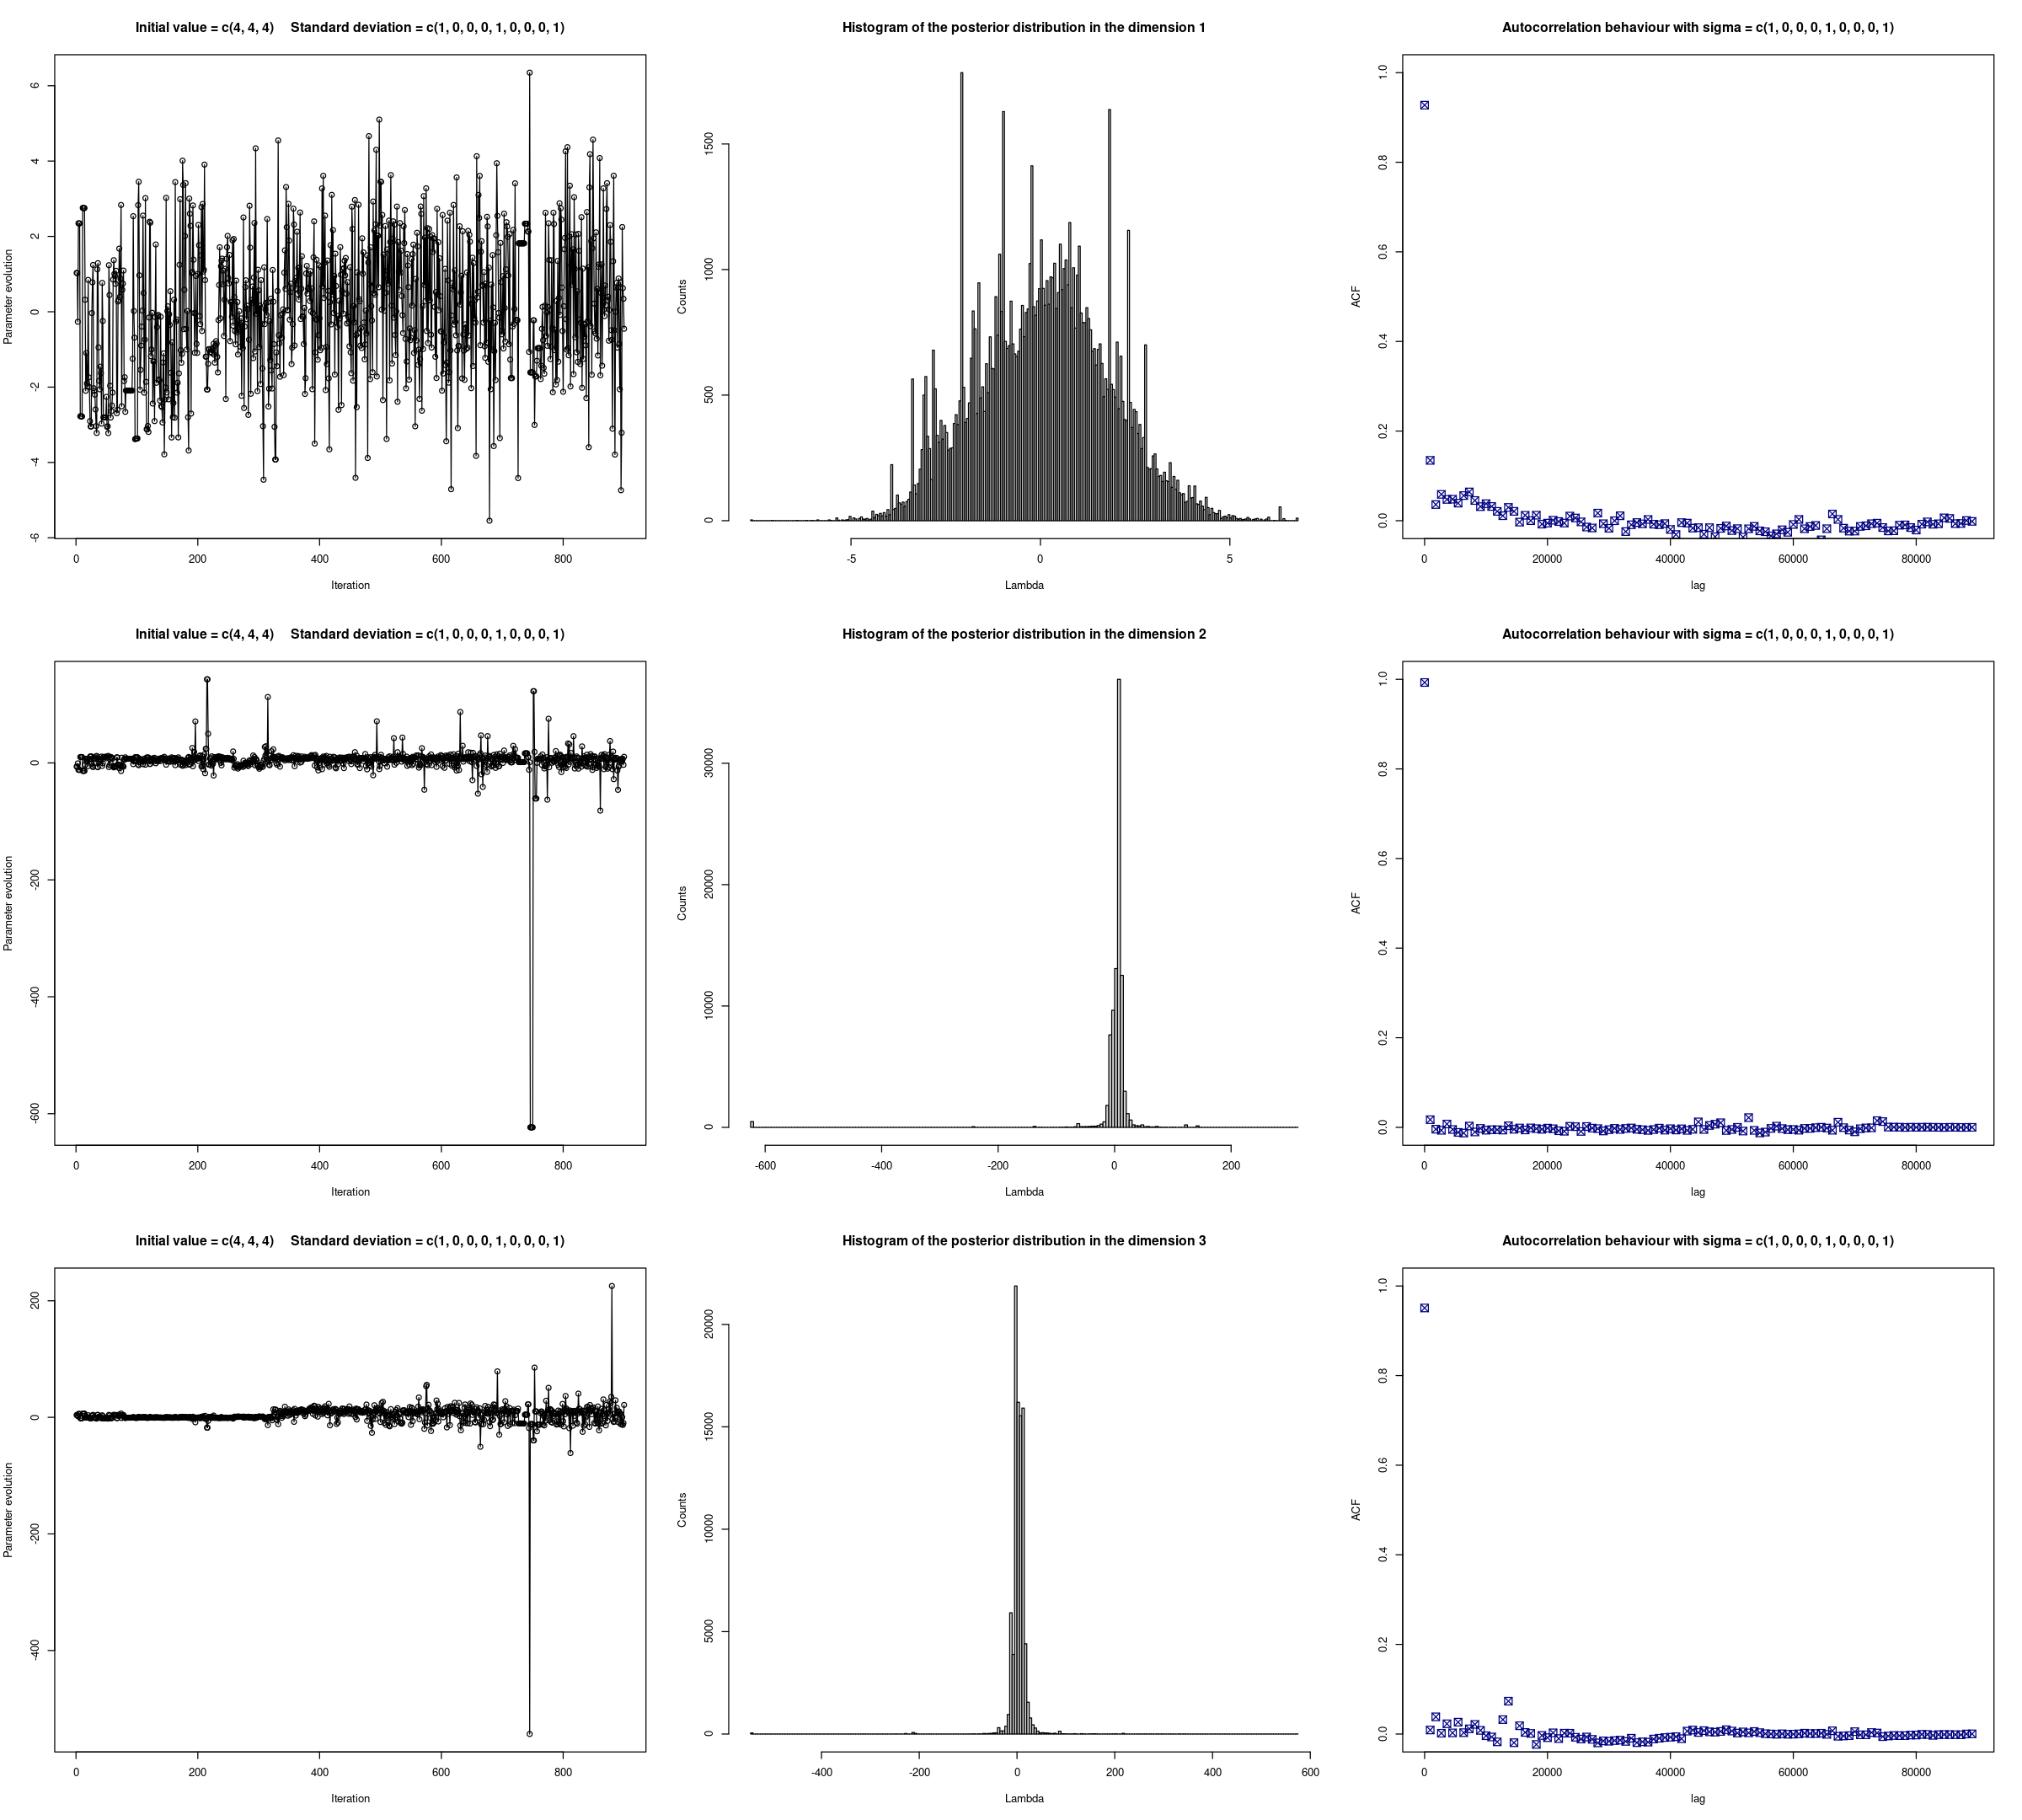

In [13]:
# GLOBAL

mcmc_g = random_steps_global (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  73.46121 %
Final mean =  0.5054928 4.384658 6.469166 
Final lambda =  -2.339514 
Final covariance matrix = 
          [,1]       [,2]       [,3]
[1,]  3.319613  -2.351732   1.765131
[2,] -2.351732 385.942024 -17.560900
[3,]  1.765131 -17.560900 119.092980


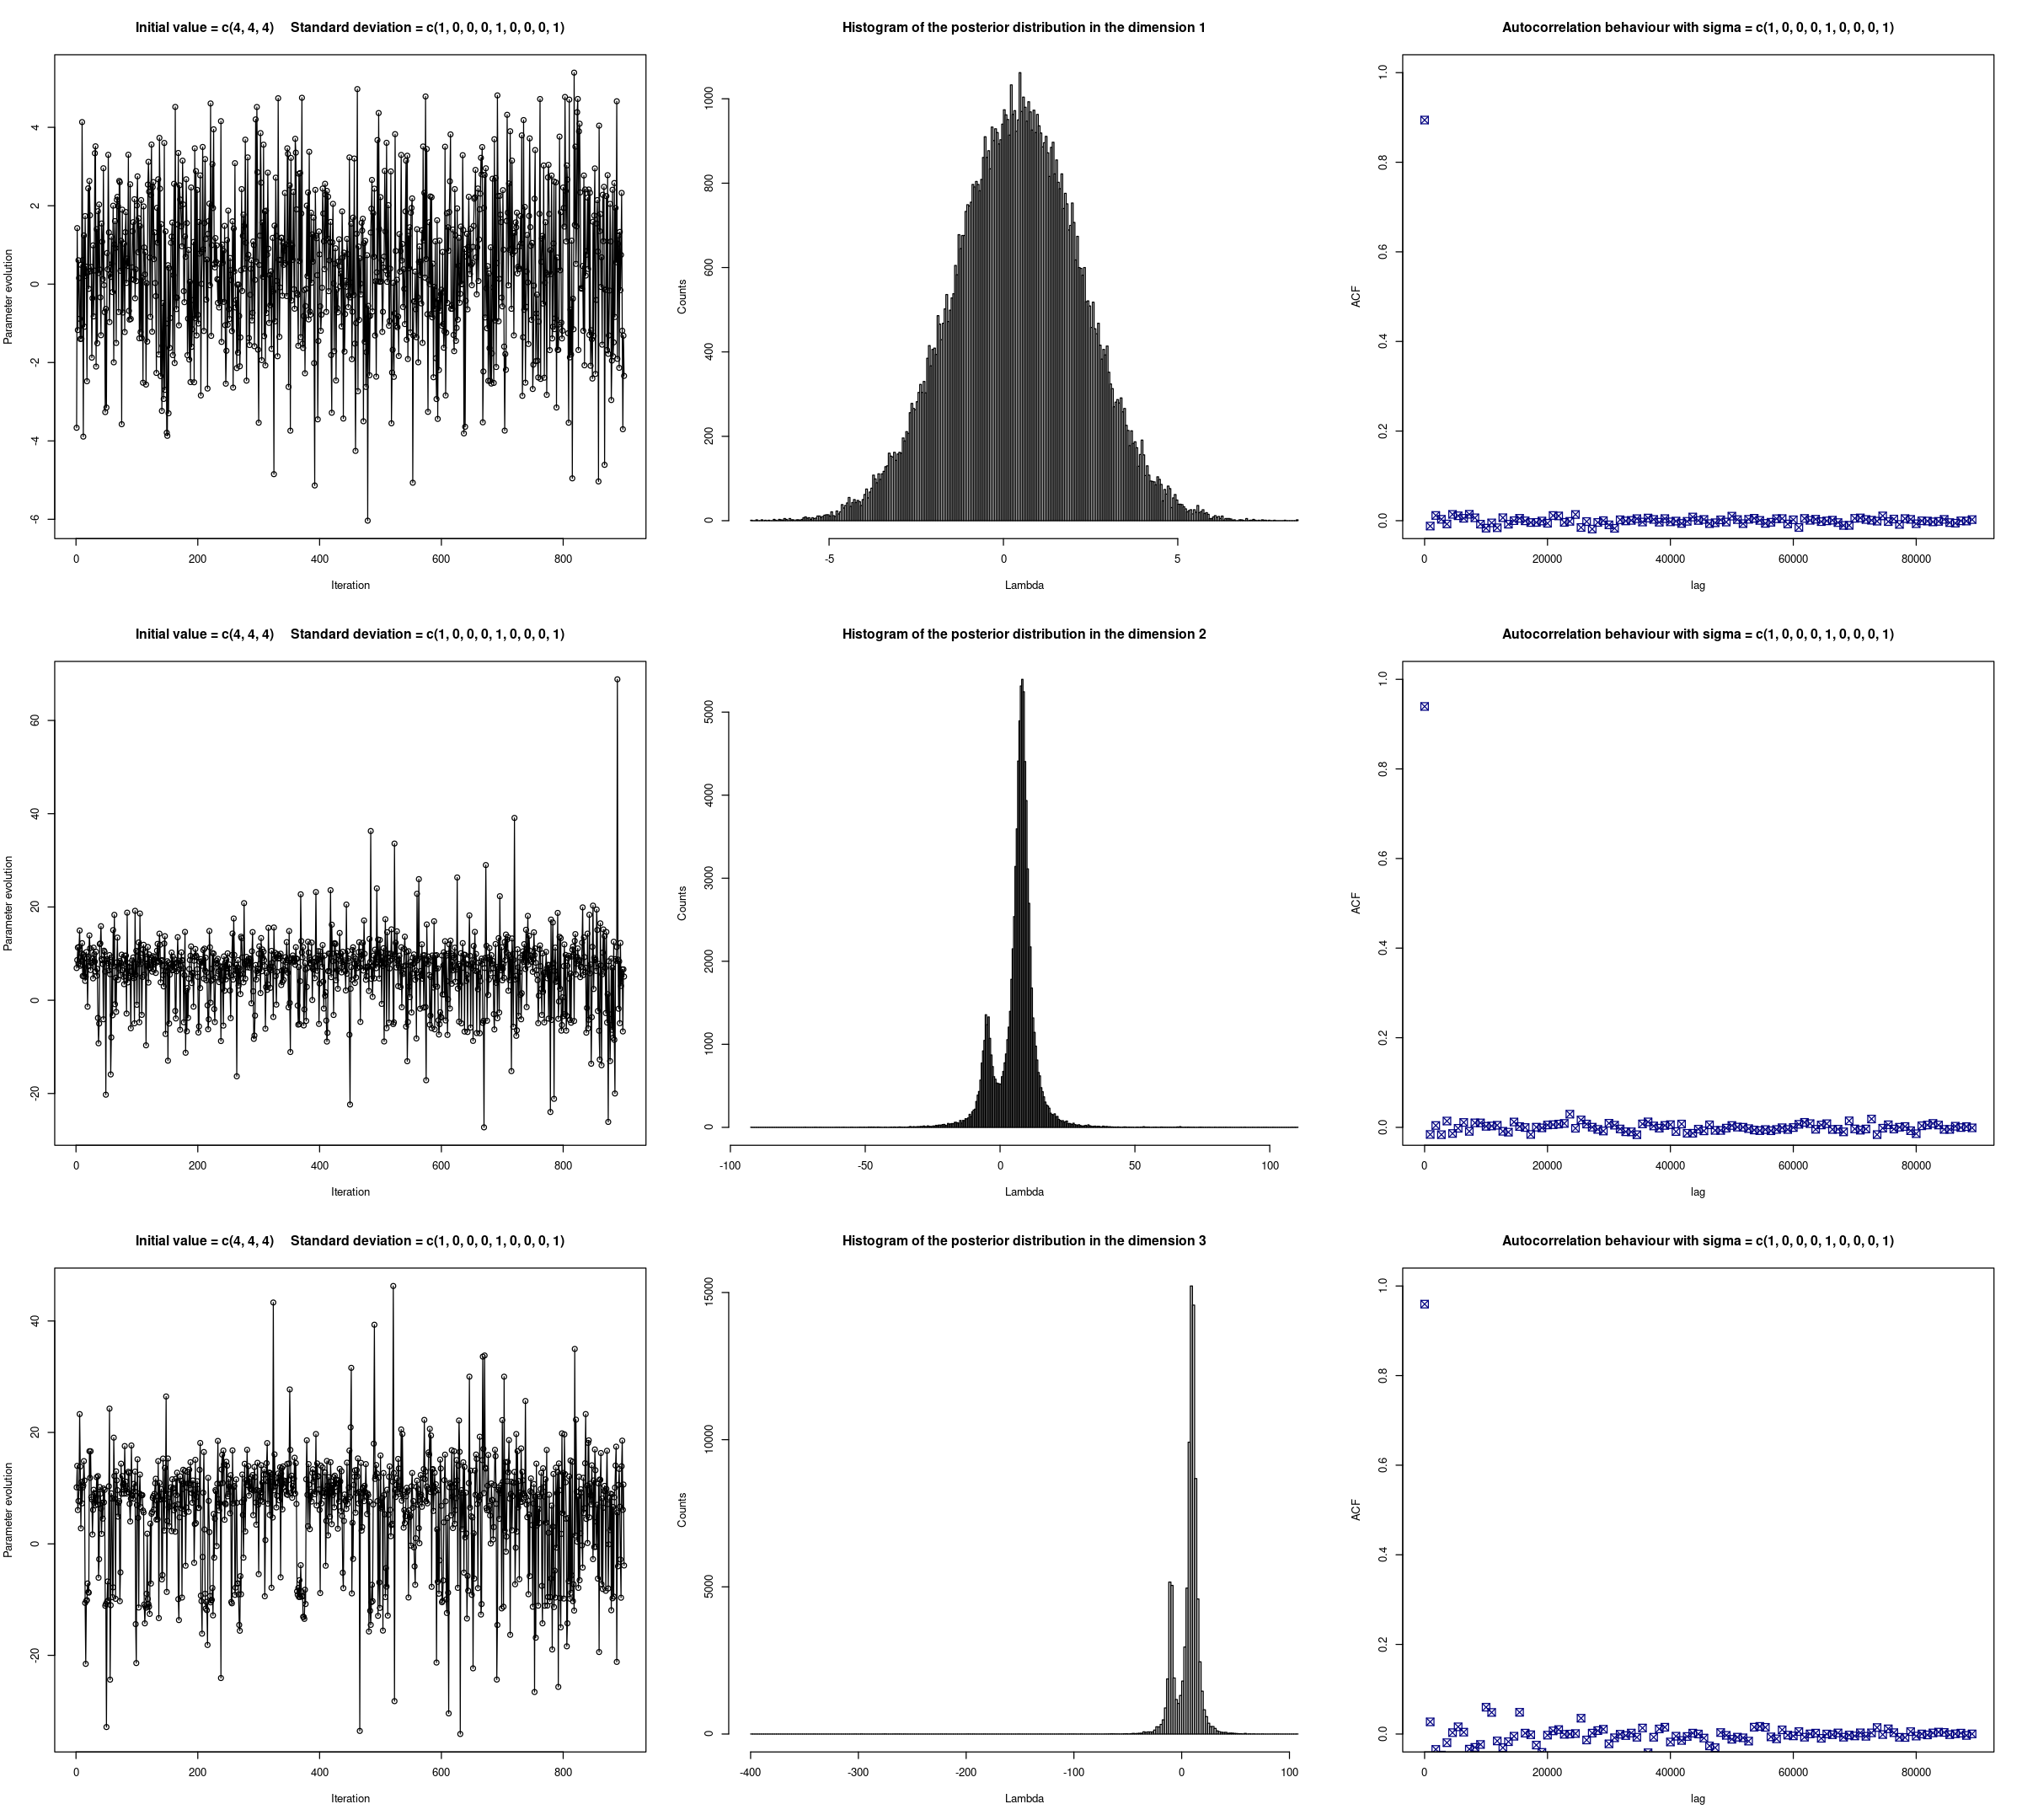

In [14]:
# GLOBAL GIBBS

mcmc_g = random_steps_global_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)